## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  15.854123   229.767033  0.282292  5.378226  1.328233
1   7.775354   293.123599  0.223534  1.501819  1.316084
2  59.348334   606.881446  0.418172  2.110977  1.483607
3  43.099379  1494.746338  0.823327  5.720715  1.699738
4  68.094988  1359.334423  0.870805  9.072677  1.435288


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9769766	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9706353	total: 69.8ms	remaining: 34.9s
2:	learn: 0.9649342	total: 70.3ms	remaining: 23.4s
3:	learn: 0.9573335	total: 70.9ms	remaining: 17.7s
4:	learn: 0.9476896	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9389871	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9318054	total: 72.3ms	remaining: 10.3s
7:	learn: 0.9243063	total: 72.8ms	remaining: 9.03s
8:	learn: 0.9170997	total: 73.3ms	remaining: 8.07s
9:	learn: 0.9073365	total: 73.8ms	remaining: 7.3s
10:	learn: 0.9006274	total: 74.3ms	remaining: 6.68s
11:	learn: 0.8917194	total: 74.7ms	remaining: 6.15s
12:	learn: 0.8835571	total: 75.4ms	remaining: 5.72s
13:	learn: 0.8762367	total: 75.7ms	remaining: 5.33s
14:	learn: 0.8707314	total: 76.2ms	remaining: 5s
15:	learn: 0.8635595	total: 76.7ms	remaining: 4.72s
16:	learn: 0.8569176	total: 77.2ms	remaining: 4.47s
17:	learn: 0.8507914	total: 77.8ms	remaining: 4.24s
18:	learn: 0.8432685	total: 78.2ms	remaining: 4.

88:	learn: 0.5177729	total: 110ms	remaining: 1.12s
89:	learn: 0.5152756	total: 110ms	remaining: 1.11s
90:	learn: 0.5121332	total: 110ms	remaining: 1.1s
91:	learn: 0.5093429	total: 111ms	remaining: 1.09s
92:	learn: 0.5066955	total: 111ms	remaining: 1.09s
93:	learn: 0.5035839	total: 112ms	remaining: 1.08s
94:	learn: 0.4998319	total: 112ms	remaining: 1.07s
95:	learn: 0.4976193	total: 113ms	remaining: 1.06s
96:	learn: 0.4948308	total: 113ms	remaining: 1.05s
97:	learn: 0.4923498	total: 113ms	remaining: 1.04s
98:	learn: 0.4898011	total: 114ms	remaining: 1.03s
99:	learn: 0.4862140	total: 114ms	remaining: 1.02s
100:	learn: 0.4833163	total: 114ms	remaining: 1.02s
101:	learn: 0.4806066	total: 115ms	remaining: 1.01s
102:	learn: 0.4780179	total: 115ms	remaining: 1s
103:	learn: 0.4746265	total: 115ms	remaining: 995ms
104:	learn: 0.4719918	total: 116ms	remaining: 987ms
105:	learn: 0.4693904	total: 116ms	remaining: 982ms
106:	learn: 0.4668185	total: 117ms	remaining: 975ms
107:	learn: 0.4643825	total:

270:	learn: 0.2290869	total: 187ms	remaining: 503ms
271:	learn: 0.2282848	total: 187ms	remaining: 501ms
272:	learn: 0.2272947	total: 188ms	remaining: 500ms
273:	learn: 0.2262391	total: 188ms	remaining: 499ms
274:	learn: 0.2253483	total: 189ms	remaining: 498ms
275:	learn: 0.2243316	total: 189ms	remaining: 497ms
276:	learn: 0.2234382	total: 190ms	remaining: 496ms
277:	learn: 0.2230685	total: 190ms	remaining: 495ms
278:	learn: 0.2219841	total: 191ms	remaining: 493ms
279:	learn: 0.2209797	total: 191ms	remaining: 492ms
280:	learn: 0.2202547	total: 192ms	remaining: 490ms
281:	learn: 0.2193955	total: 192ms	remaining: 489ms
282:	learn: 0.2184243	total: 192ms	remaining: 488ms
283:	learn: 0.2178264	total: 193ms	remaining: 486ms
284:	learn: 0.2171219	total: 193ms	remaining: 485ms
285:	learn: 0.2162966	total: 194ms	remaining: 483ms
286:	learn: 0.2155814	total: 194ms	remaining: 482ms
287:	learn: 0.2147316	total: 194ms	remaining: 480ms
288:	learn: 0.2142447	total: 194ms	remaining: 479ms
289:	learn: 

512:	learn: 0.1035753	total: 292ms	remaining: 277ms
513:	learn: 0.1034774	total: 292ms	remaining: 277ms
514:	learn: 0.1031757	total: 293ms	remaining: 276ms
515:	learn: 0.1029348	total: 293ms	remaining: 275ms
516:	learn: 0.1025969	total: 294ms	remaining: 274ms
517:	learn: 0.1024903	total: 294ms	remaining: 274ms
518:	learn: 0.1022541	total: 294ms	remaining: 273ms
519:	learn: 0.1021589	total: 295ms	remaining: 272ms
520:	learn: 0.1018658	total: 295ms	remaining: 271ms
521:	learn: 0.1013284	total: 296ms	remaining: 271ms
522:	learn: 0.1010999	total: 296ms	remaining: 270ms
523:	learn: 0.1007456	total: 297ms	remaining: 269ms
524:	learn: 0.1002205	total: 297ms	remaining: 269ms
525:	learn: 0.0999969	total: 297ms	remaining: 268ms
526:	learn: 0.0996512	total: 298ms	remaining: 267ms
527:	learn: 0.0994488	total: 298ms	remaining: 266ms
528:	learn: 0.0989366	total: 299ms	remaining: 266ms
529:	learn: 0.0986582	total: 299ms	remaining: 265ms
530:	learn: 0.0983220	total: 299ms	remaining: 264ms
531:	learn: 

697:	learn: 0.0643363	total: 369ms	remaining: 160ms
698:	learn: 0.0641818	total: 370ms	remaining: 159ms
699:	learn: 0.0641163	total: 370ms	remaining: 159ms
700:	learn: 0.0639640	total: 371ms	remaining: 158ms
701:	learn: 0.0638143	total: 371ms	remaining: 158ms
702:	learn: 0.0636671	total: 372ms	remaining: 157ms
703:	learn: 0.0636074	total: 372ms	remaining: 156ms
704:	learn: 0.0633626	total: 373ms	remaining: 156ms
705:	learn: 0.0632173	total: 373ms	remaining: 155ms
706:	learn: 0.0629686	total: 373ms	remaining: 155ms
707:	learn: 0.0628683	total: 374ms	remaining: 154ms
708:	learn: 0.0627222	total: 374ms	remaining: 154ms
709:	learn: 0.0625269	total: 374ms	remaining: 153ms
710:	learn: 0.0622958	total: 375ms	remaining: 152ms
711:	learn: 0.0622255	total: 375ms	remaining: 152ms
712:	learn: 0.0620832	total: 376ms	remaining: 151ms
713:	learn: 0.0618847	total: 376ms	remaining: 151ms
714:	learn: 0.0618161	total: 376ms	remaining: 150ms
715:	learn: 0.0616758	total: 377ms	remaining: 149ms
716:	learn: 

939:	learn: 0.0402524	total: 475ms	remaining: 30.3ms
940:	learn: 0.0401611	total: 475ms	remaining: 29.8ms
941:	learn: 0.0401458	total: 475ms	remaining: 29.3ms
942:	learn: 0.0400710	total: 476ms	remaining: 28.8ms
943:	learn: 0.0399809	total: 476ms	remaining: 28.2ms
944:	learn: 0.0398329	total: 476ms	remaining: 27.7ms
945:	learn: 0.0397652	total: 477ms	remaining: 27.2ms
946:	learn: 0.0396666	total: 477ms	remaining: 26.7ms
947:	learn: 0.0396515	total: 478ms	remaining: 26.2ms
948:	learn: 0.0395481	total: 478ms	remaining: 25.7ms
949:	learn: 0.0395335	total: 478ms	remaining: 25.2ms
950:	learn: 0.0394562	total: 479ms	remaining: 24.7ms
951:	learn: 0.0393685	total: 479ms	remaining: 24.2ms
952:	learn: 0.0393026	total: 480ms	remaining: 23.7ms
953:	learn: 0.0392019	total: 480ms	remaining: 23.2ms
954:	learn: 0.0391154	total: 481ms	remaining: 22.6ms
955:	learn: 0.0390417	total: 481ms	remaining: 22.1ms
956:	learn: 0.0388998	total: 481ms	remaining: 21.6ms
957:	learn: 0.0388582	total: 482ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

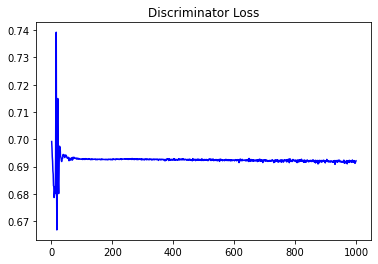

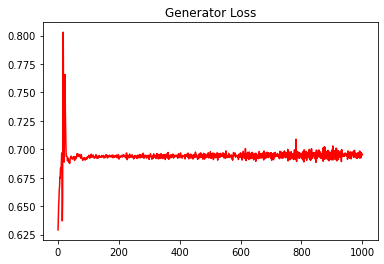

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3246654588116434


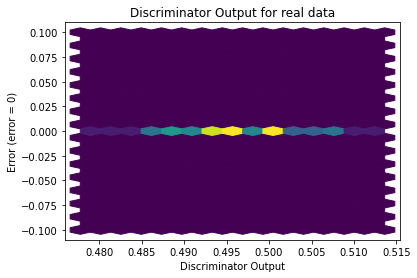

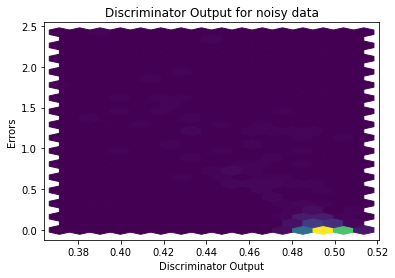

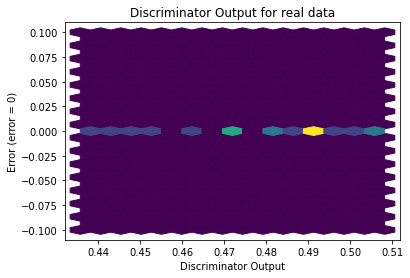

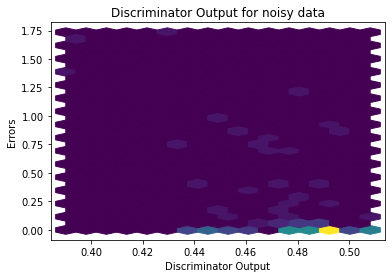

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


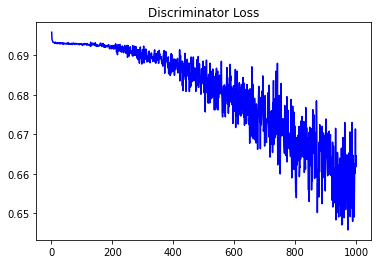

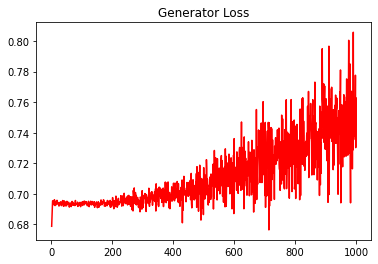

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.27365680091250216


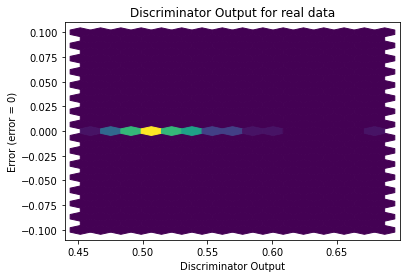

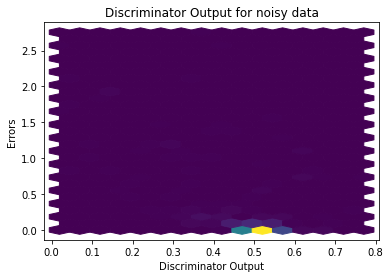

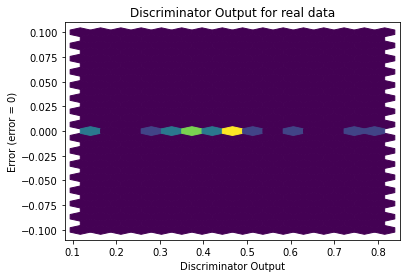

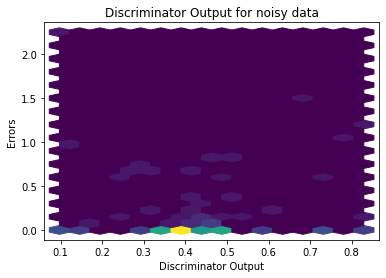

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
